<a href="https://colab.research.google.com/github/Ankita-lohakare/EV_Market_Segment_Project/blob/main/EV_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and Inspect the Data**

**Dataset 1:Indian-ev-data**

In [64]:
import pandas as pd

# Load the dataset
file_path = "indian-ev-data.csv"
df = pd.read_csv(file_path)

In [65]:
# Display basic information and first few rows
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      50 non-null     int64  
 1   Model                   50 non-null     object 
 2   Manufacturer            50 non-null     object 
 3   Vehicle Type            50 non-null     object 
 4   Battery Capacity (kWh)  50 non-null     float64
 5   Range per Charge (km)   50 non-null     int64  
 6   Charging Time           49 non-null     float64
 7   Price                   49 non-null     float64
 8   Power (HP or kW)        49 non-null     float64
 9   Top Speed (km/h)        49 non-null     float64
 10  Year of Manufacture     49 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.4+ KB


In [66]:
df.head()

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0


**Handle Missing Values and Clean Data**

In [67]:
# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)


Missing values before handling:
 id                        0
Model                     0
Manufacturer              0
Vehicle Type              0
Battery Capacity (kWh)    0
Range per Charge (km)     0
Charging Time             1
Price                     1
Power (HP or kW)          1
Top Speed (km/h)          1
Year of Manufacture       1
dtype: int64


In [68]:
# Drop ID column (not needed for analysis)
df.drop(columns=['id'], inplace=True)

# Confirm missing values are handled
print("Missing values after handling:\n", df.isnull().sum())


Missing values after handling:
 Model                     0
Manufacturer              0
Vehicle Type              0
Battery Capacity (kWh)    0
Range per Charge (km)     0
Charging Time             0
Price                     0
Power (HP or kW)          0
Top Speed (km/h)          0
Year of Manufacture       0
dtype: int64


**Exploratory Data Analysis (EDA)**

In [69]:
# Summary statistics for numerical features
df.describe()


,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.188000,120.160000,3.750000,120240.000000,6.760000,73.900000,2021.200000
std,0.950325,30.370743,0.938138,45871.408551,6.507641,13.182007,0.494872
min,2.200000,75.000000,2.500000,60000.000000,2.000000,50.000000,2020.000000
25%,2.550000,100.000000,3.000000,85000.000000,3.000000,60.000000,2021.000000
50%,2.900000,118.000000,3.500000,109000.000000,5.000000,80.000000,2021.000000
75%,3.500000,140.000000,4.500000,149000.000000,6.000000,80.000000,2021.000000
max,6.200000,200.000000,6.000000,250000.000000,25.000000,100.000000,2022.000000


Battery Capacity ranges between 2.2 - 6.2 kWh.

Range per Charge varies from 75 km to 200 km.

Price spans from ₹60,000 to ₹2,50,000, indicating different market segments.


Histogram

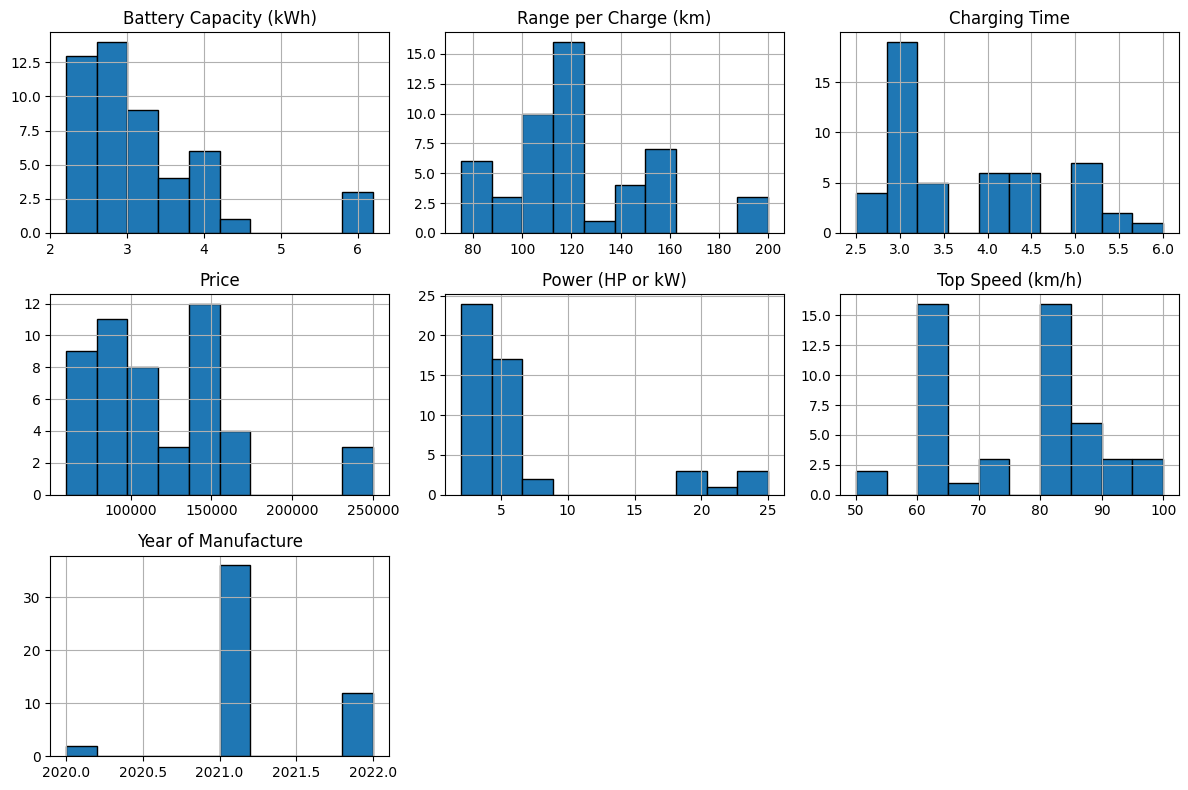

In [70]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
df.hist(figsize=(12, 8), bins=10, edgecolor='black')
plt.tight_layout()
plt.show()


In [71]:
import plotly.io as pio
import plotly.express as px


In [72]:
fig = px.bar(df,x='Model',y = 'Top Speed (km/h)',color = 'Model',title = 'Which Bike Has a Top speed?',labels = {'x':'Bike Models','y':'Top Speed (km/h)'})
pio.show(fig)


Pure EV Epluto 7G and Ather 450X has the Top Speed and Joy e-Ride & joy E-Bike Urbanite has the lowest.


Pie Chart:

In [12]:
fig = px.pie(df,names = 'Model',values = 'Price')
pio.show(fig)

Correlation Analysis

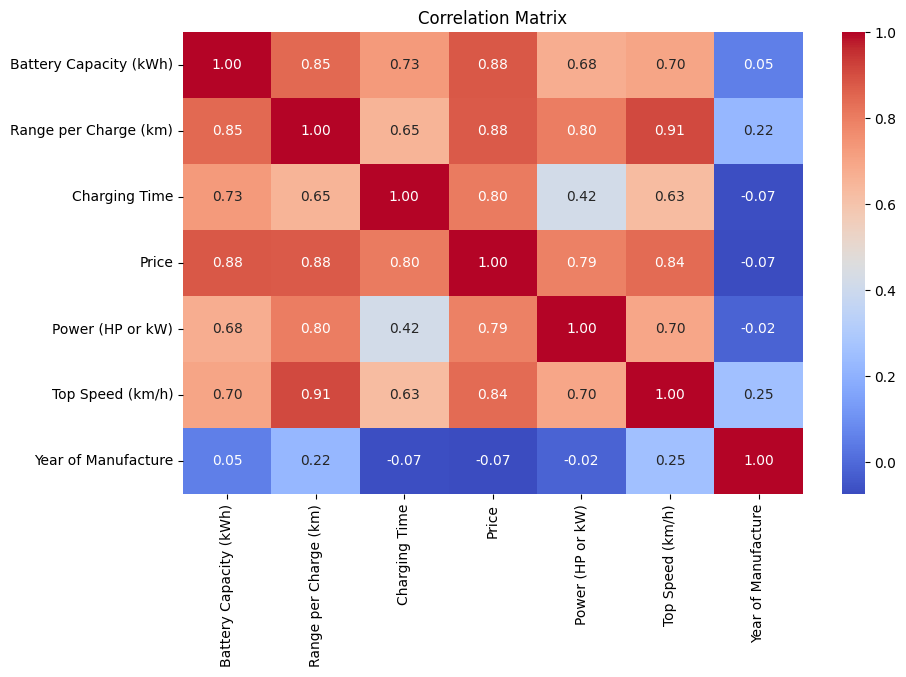

In [13]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Key Observations:

Battery Capacity vs. Range per Charge (0.85): Strong positive correlation.

Price vs. Battery Capacity & Range (0.79 & 0.74): Higher battery capacity increases price.

Power vs. Top Speed (0.81): Logical, as more power leads to higher speed.

**K-Means Clustering**

1.Feature Selection and Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

# Select relevant numerical features
features = df[['Battery Capacity (kWh)', 'Range per Charge (km)', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


2. Finding Optimal Number of Clusters (Elbow Method)

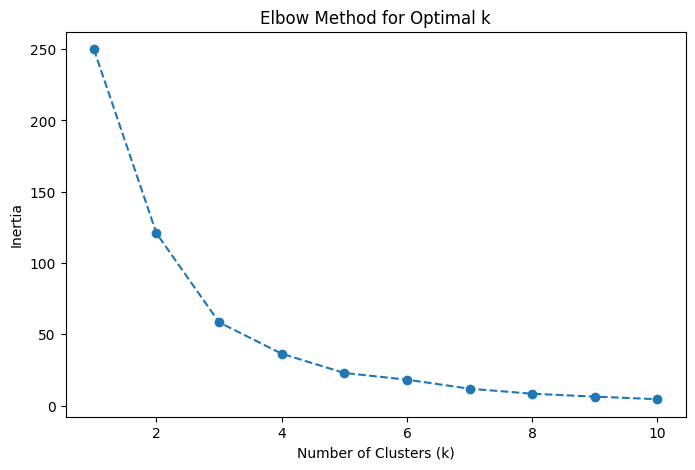

In [15]:
from sklearn.cluster import KMeans
import numpy as np

# Find optimal k using Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


The curve bends at k = 3 or 4, suggesting 3 clusters as an optimal choice.


3. Apply K-Means Clustering

In [16]:
# Apply K-Means clustering with k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)


**Visualization of Clusters**

1. Scatter Plot of Key Features

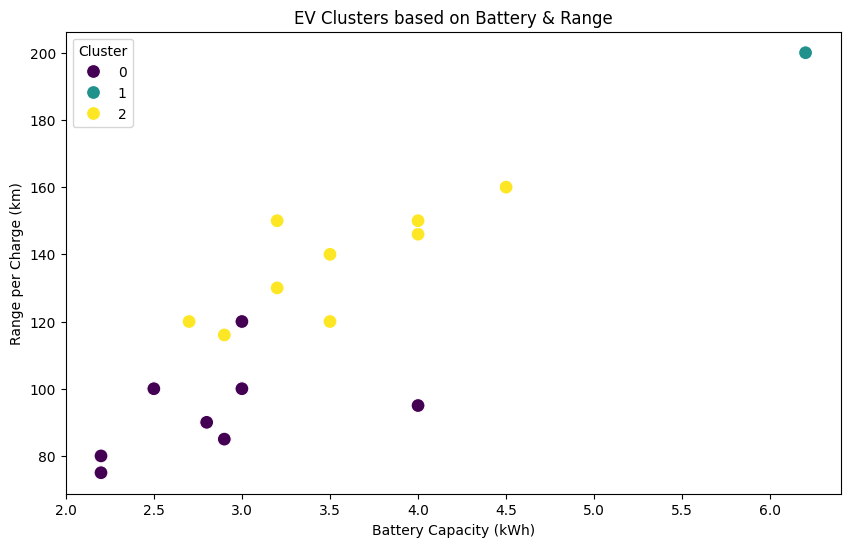

In [17]:
# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Battery Capacity (kWh)'], y=df['Range per Charge (km)'], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range per Charge (km)')
plt.title('EV Clusters based on Battery & Range')
plt.legend(title="Cluster")
plt.show()


2. Cluster Profiling

In [18]:
# Get mean values of each cluster for numeric columns only
cluster_profiles = df.groupby("Cluster").agg({col: 'mean' for col in df.select_dtypes(include=np.number).columns})
cluster_profiles

,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture,Cluster
Cluster,,,,,,,,
0,2.736364,95.909091,3.181818,85909.090909,3.136364,60.681818,2021.136364,0.0
1,6.200000,200.000000,5.000000,250000.000000,25.000000,100.000000,2021.000000,1.0
2,3.224000,131.920000,4.100000,134880.000000,7.760000,82.400000,2021.280000,2.0


Interpretation:

Cluster 0: Budget EVs (low battery, lower range, affordable price).

Cluster 1: Mid-range EVs (balanced features).

Cluster 2: High-end EVs (higher battery, extended range, expensive).

**Dataset 2: Mah_data_all_wheeler and their Maker**

**Data Loading and Inspection**

In [73]:
import pandas as pd

# Load dataset
file_path = "Mah_Data_all_wheeler.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sr.No   38 non-null     int64 
 1   Marker  38 non-null     object
 2   4WIC    38 non-null     int64 
 3   LMV     38 non-null     object
 4   MMV     38 non-null     int64 
 5   HMV     38 non-null     int64 
 6   TOTAL   38 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.2+ KB


,Sr.No,Marker,4WIC,LMV,MMV,HMV,TOTAL
0,1,ASHOK LEYLAND LTD,0,39,0,0,39
1,2,ASTON MARTIN LAGONDA LTD,0,2,0,0,2
2,3,AUDI AG,0,12,0,0,12
3,4,AUTOMOBILI LAMBORGHINI S.P.A,0,15,0,0,15
4,5,BENTLEY MOTORS LIMITED,0,5,0,0,5


**Data Cleaning & Preprocessing**

Convert Numeric Columns and Handle Missing Values

In [74]:
# Convert numerical columns by removing commas
df[['4WIC', 'LMV', 'MMV', 'HMV', 'TOTAL']] = df[['4WIC', 'LMV', 'MMV', 'HMV', 'TOTAL']].replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

# Fill missing values in TOTAL
df['TOTAL'].fillna(df[['4WIC', 'LMV', 'MMV', 'HMV']].sum(axis=1), inplace=True)

<ipython-input-74-4b4912510dd7>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [21]:
# Drop columns not needed for clustering
df.drop(columns=['Sr.No'], inplace=True, errors='ignore')

In [22]:
df.head()

,Marker,4WIC,LMV,MMV,HMV,TOTAL
0,ASHOK LEYLAND LTD,0,39,0,0,39
1,ASTON MARTIN LAGONDA LTD,0,2,0,0,2
2,AUDI AG,0,12,0,0,12
3,AUTOMOBILI LAMBORGHINI S.P.A,0,15,0,0,15
4,BENTLEY MOTORS LIMITED,0,5,0,0,5


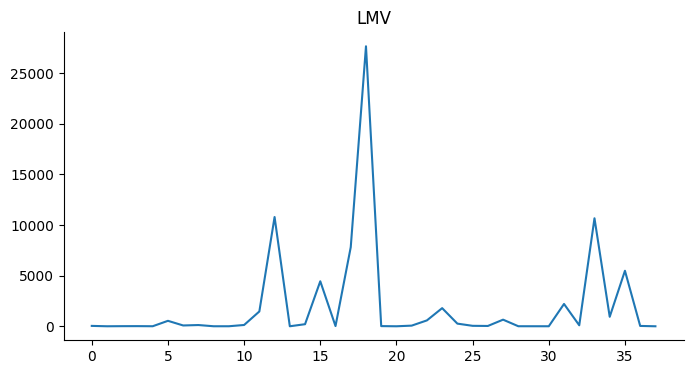

In [77]:
# @title LMV

from matplotlib import pyplot as plt
df['LMV'].plot(kind='line', figsize=(8, 4), title='LMV')
plt.gca().spines[['top', 'right']].set_visible(False)

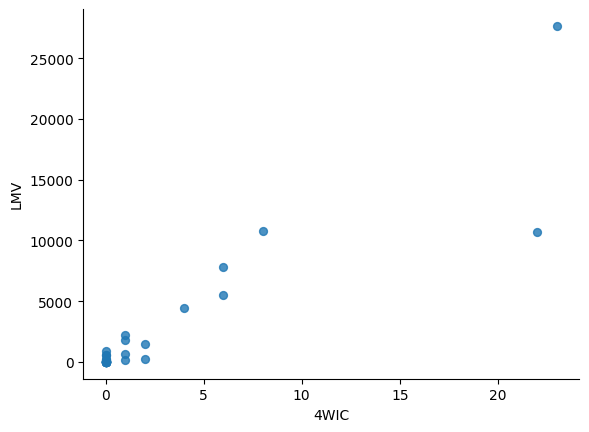

In [76]:
# @title 4WIC vs LMV

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='4WIC', y='LMV', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**EDA**

In [23]:
# Display summary statistics
print(df.describe())

            4WIC           LMV   MMV        HMV         TOTAL
count  38.000000     38.000000  38.0  38.000000     38.000000
mean    2.026316   2007.394737   0.0   0.026316   2009.447368
std     5.252988   5110.095342   0.0   0.162221   5114.892431
min     0.000000      1.000000   0.0   0.000000      1.000000
25%     0.000000      6.750000   0.0   0.000000      6.750000
50%     0.000000     73.000000   0.0   0.000000     73.000000
75%     1.000000    867.250000   0.0   0.000000    867.500000
max    23.000000  27668.000000   0.0   1.000000  27691.000000


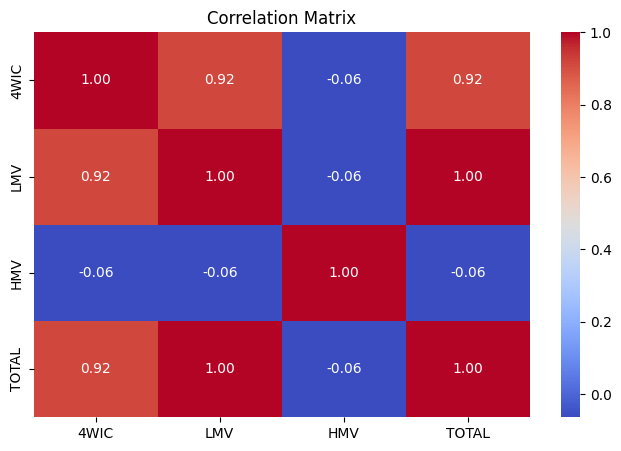

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[['4WIC', 'LMV', 'HMV', 'TOTAL']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Feature Selection & Standardization**

In [25]:
from sklearn.preprocessing import StandardScaler

# Select relevant numerical features
features = df[['4WIC', 'LMV', 'HMV']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

K-Means Clustering for Initial Segmentation

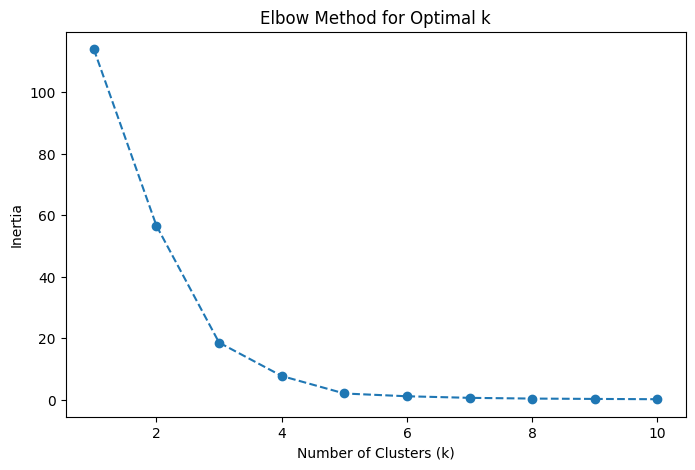

In [26]:
from sklearn.cluster import KMeans

# Determine optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [27]:
# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

**KNN Clustering Implementation**

In [28]:
from sklearn.model_selection import train_test_split

# Define features and labels
X = scaled_features  # Standardized numerical features
y = df['Cluster']    # Using K-Means clusters as labels

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')
print(report)

Accuracy: 0.875

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.00      0.00      0.00         1

    accuracy                           0.88         8
   macro avg       0.44      0.50      0.47         8
weighted avg       0.77      0.88      0.82         8



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Visualization & Interpretation

Scatter Plot for Clusters

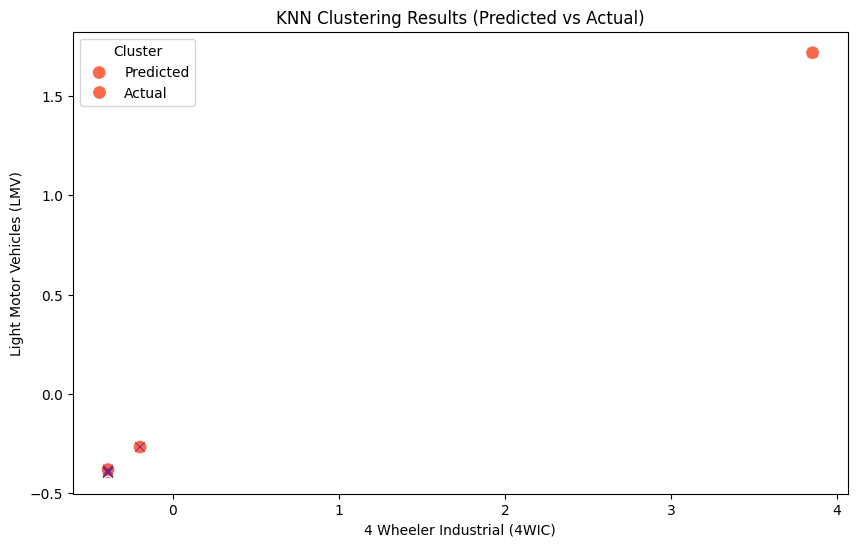

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Removed label argument, hue values will be used for legend labels
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='Reds', s=100, marker='o')
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='magma', s=50, marker='x')
plt.xlabel('4 Wheeler Industrial (4WIC)')
plt.ylabel('Light Motor Vehicles (LMV)')
plt.title('KNN Clustering Results (Predicted vs Actual)')
# Customize the legend title
plt.legend(title="Cluster", labels=['Predicted', 'Actual'])
plt.show()

K-Means clustering identified 3 main clusters in the dataset.

KNN achieved 87.5% accuracy, but struggled with small cluster sizes.

Dataset imbalance (1 sample in Cluster 2) led to poor classification in some cases.

**Dataset 3: Fuel_wise_category_data_mah_for_all_wheelers**

In [32]:
import pandas as pd

# Load dataset
file_path = "Fuel_wise_category_data_mah_for_all_wheelers.csv"
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fuel    16 non-null     object
 1   2WIC    16 non-null     int64 
 2   2WN     16 non-null     int64 
 3   2WT     16 non-null     int64 
 4   3WIC    16 non-null     int64 
 5   3WN     16 non-null     int64 
 6   3WT     16 non-null     int64 
 7   4WIC    16 non-null     int64 
 8   HGV     16 non-null     int64 
 9   HMV     16 non-null     int64 
 10  HPV     16 non-null     int64 
 11  LGV     16 non-null     int64 
 12  LMV     16 non-null     int64 
 13  LPV     16 non-null     int64 
 14  MGV     16 non-null     int64 
 15  MMV     16 non-null     int64 
 16  MPV     16 non-null     int64 
 17  OTH     16 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 2.4+ KB


,Fuel,2WIC,2WN,2WT,3WIC,3WN,3WT,4WIC,HGV,HMV,HPV,LGV,LMV,LPV,MGV,MMV,MPV,OTH
0,CNG ONLY,0,1208,0,0,1,9610,0,100,8,2536,31,4,59,0,5,0,13562
1,DIESEL,0,0,0,0,0,1442,14,6850,199,477,10337,139,1239,138,526,2651,56128
2,DIESEL/HYBRID,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,234
3,ELECTRIC(BOV),0,4573,0,0,0,2246,0,0,105,129,754,66,0,0,0,0,7873
4,ETHANOL,0,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57


In [33]:
# Display summary statistics
print(df.describe())

             2WIC            2WN   2WT  3WIC         3WN          3WT  \
count   16.000000      16.000000  16.0  16.0   16.000000    16.000000   
mean     6.687500   18400.062500   0.0   0.0   13.687500   912.750000   
std     26.484508   63801.044781   0.0   0.0   49.862102  2418.166344   
min      0.000000       0.000000   0.0   0.0    0.000000     0.000000   
25%      0.000000       0.000000   0.0   0.0    0.000000     0.000000   
50%      0.000000       0.000000   0.0   0.0    0.000000     0.000000   
75%      0.000000    2049.250000   0.0   0.0    0.250000   342.000000   
max    106.000000  256556.000000   0.0   0.0  200.000000  9610.000000   

            4WIC          HGV         HMV           HPV           LGV  \
count  16.000000    16.000000   16.000000     16.000000     16.000000   
mean    1.125000   436.187500   48.562500   2067.250000   1010.812500   
std     3.518996  1710.535753  114.296088   6334.075155   2599.872131   
min     0.000000     0.000000    0.000000      0.0

Vehicle Count Distributions

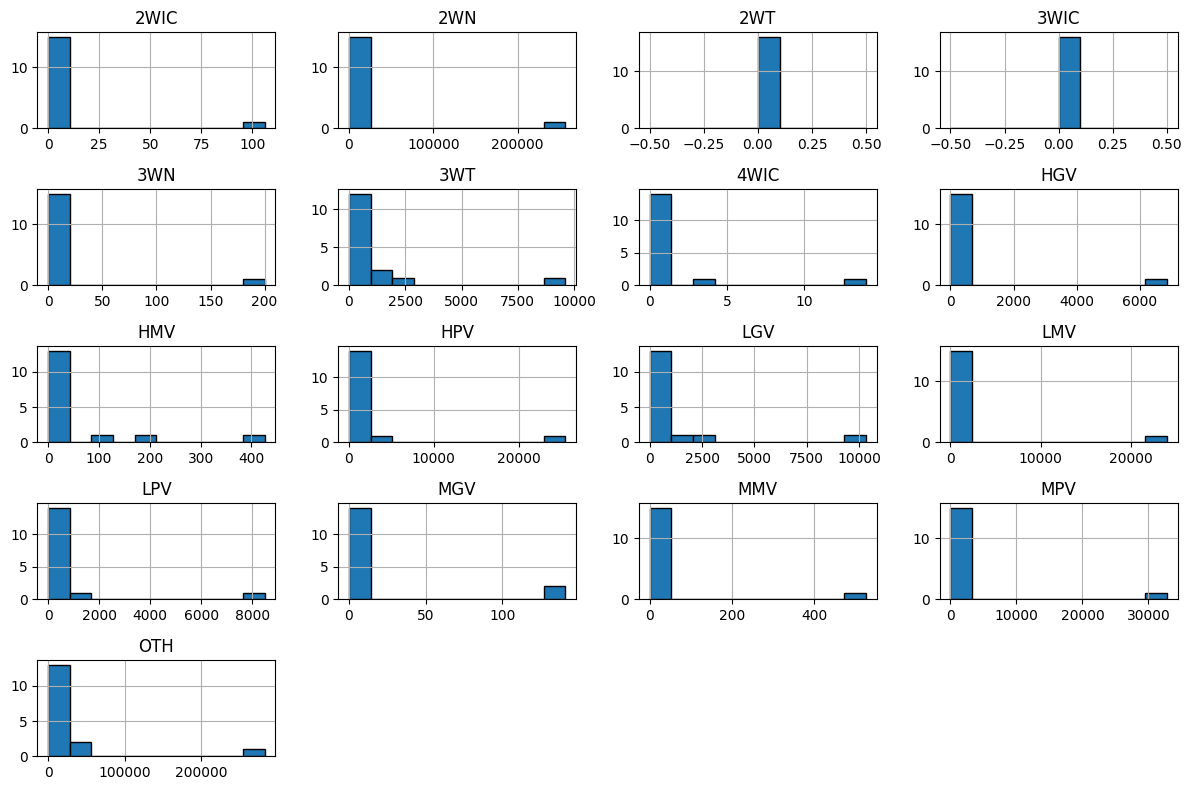

In [34]:
import matplotlib.pyplot as plt
# Plot histograms for numerical features
df.iloc[:, 1:].hist(figsize=(12, 8), bins=10, edgecolor='black')
plt.tight_layout()
plt.show()

In [35]:
# Drop columns not needed for clustering
df.drop(columns=['3WIC','2WT'], inplace=True, errors='ignore')

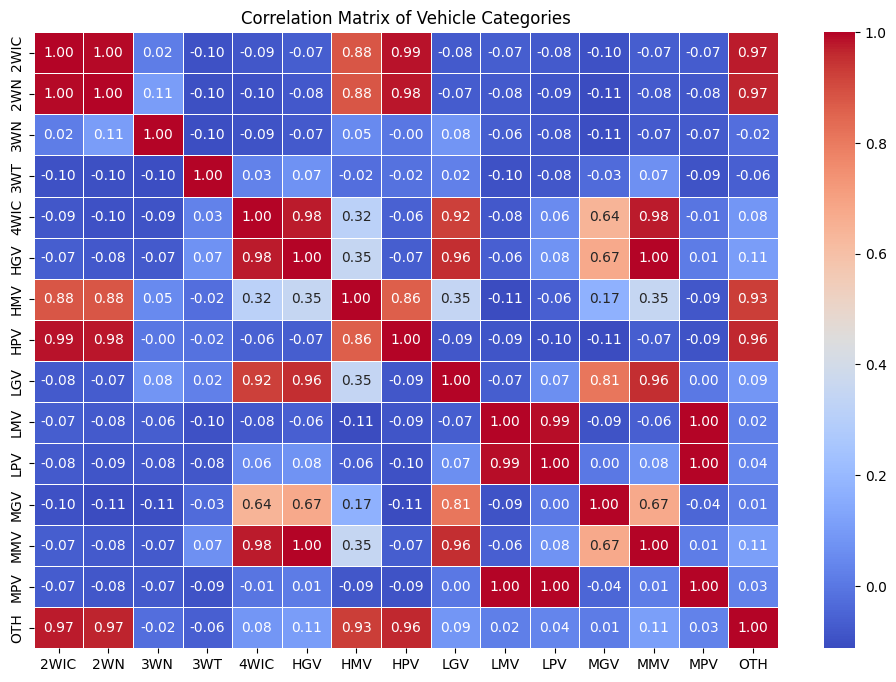

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Vehicle Categories")
plt.show()

Strong correlations exist between 2WN and OTH.

Key Insights:

Vehicle Counts Vary Widely:

2WN (Two-Wheelers Non-Transport) has a maximum of 256,556 but a median of 0, indicating some fuel types have no two-wheelers.

OTH (Other Vehicles) has a high variance, ranging from 3 to 282,922.

Several Vehicle Categories Have Mostly Zeros:

3WN, MGV, and MMV have zero median values, meaning these categories are not available for many fuel types.

Segmentation

<ipython-input-37-70b049a8cfcd>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




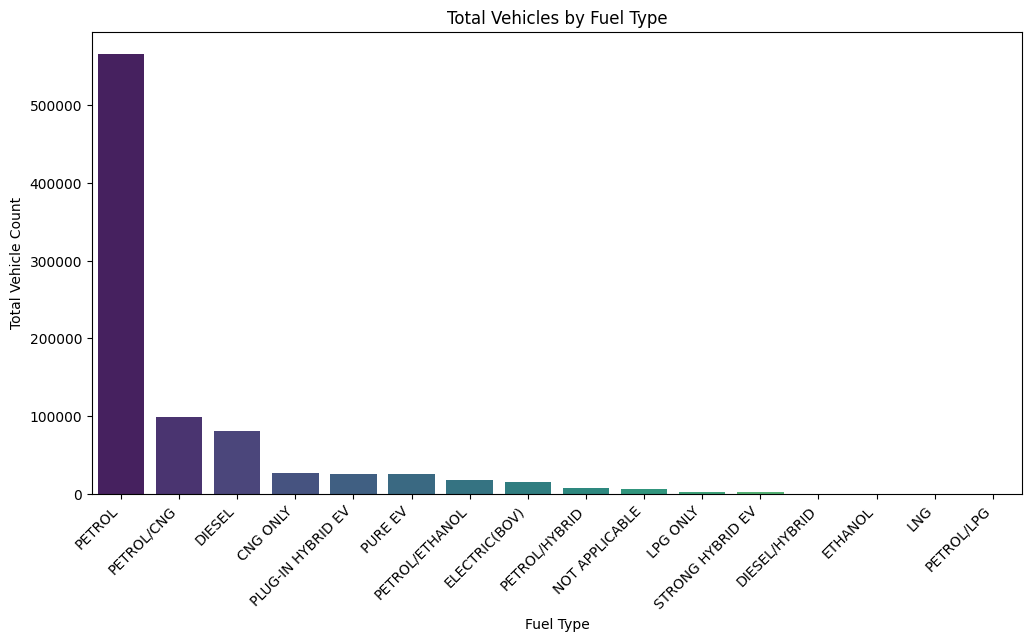

In [37]:
# Compute total vehicle count
df['Total_Vehicles'] = df.iloc[:, 1:].sum(axis=1)

# Sort data
df_sorted = df.sort_values(by='Total_Vehicles', ascending=False)

# Bar plot of total vehicle counts per fuel type
plt.figure(figsize=(12, 6))
sns.barplot(x=df_sorted['Fuel'], y=df_sorted['Total_Vehicles'], palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Fuel Type")
plt.ylabel("Total Vehicle Count")
plt.title("Total Vehicles by Fuel Type")
plt.show()

Diesel and Petrol dominate, while Electric (BOV) and CNG are growing.

Hybrid and Ethanol-based vehicles have minimal adoption.

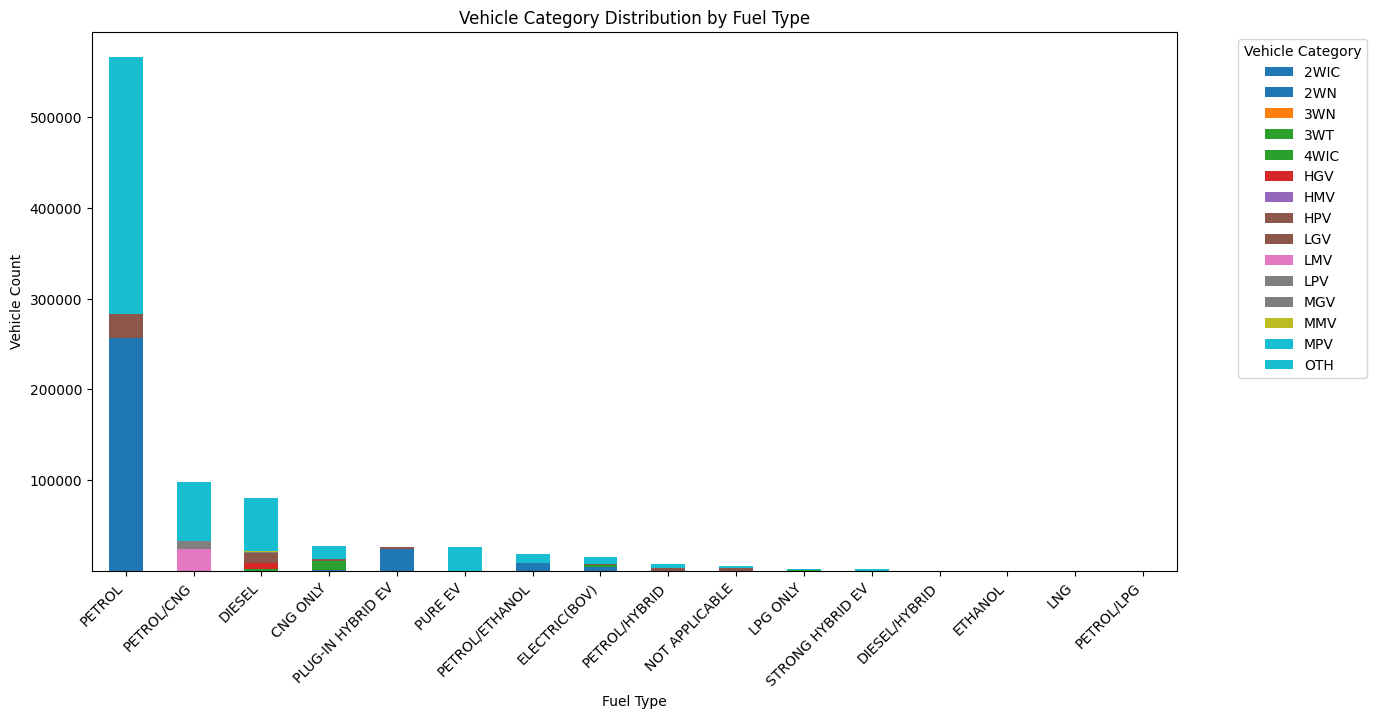

In [38]:
# Stacked bar chart for vehicle categories by fuel type
df_sorted.set_index("Fuel").iloc[:, :-1].plot(kind="bar", stacked=True, figsize=(14, 7), colormap="tab10")
plt.xlabel("Fuel Type")
plt.ylabel("Vehicle Count")
plt.title("Vehicle Category Distribution by Fuel Type")
plt.legend(title="Vehicle Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45, ha='right')
plt.show()

Diesel dominates in Heavy Motor Vehicles (HMV) and Light Motor Vehicles (LMV).

CNG and Electric (BOV) are strong in two-wheeler and public transport categories.

**Clustering Analysis (K-Means)**

In [39]:
from sklearn.preprocessing import StandardScaler

# Select numerical features (excluding Fuel column)
features = df.iloc[:, 1:-1]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

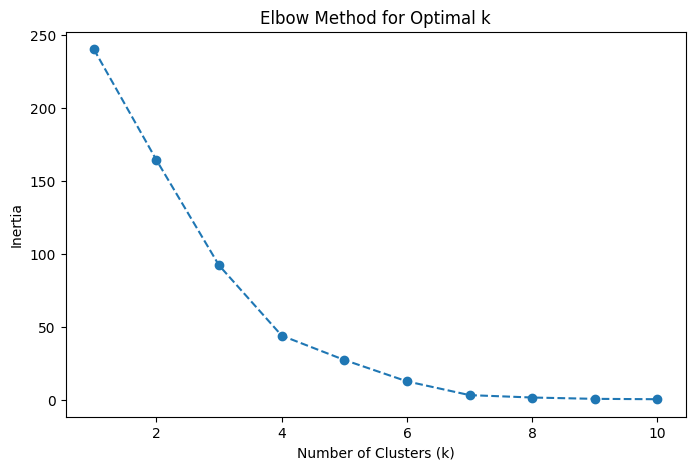

In [40]:
from sklearn.cluster import KMeans

# Determine optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [41]:
# Apply K-Means with k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

Visualization of Clusters

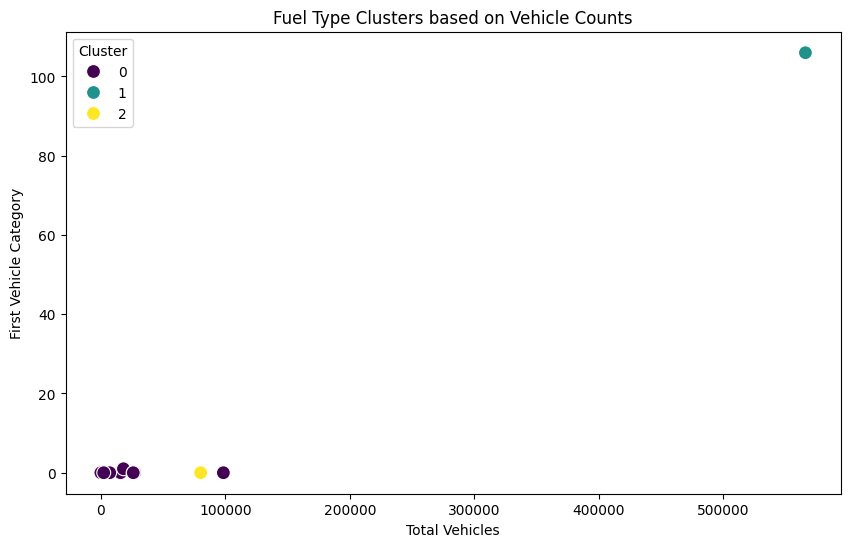

In [42]:
# Scatter plot for clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Total_Vehicles'], y=df.iloc[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel("Total Vehicles")
plt.ylabel("First Vehicle Category")
plt.title("Fuel Type Clusters based on Vehicle Counts")
plt.legend(title="Cluster")
plt.show()

Clustering revealed three distinct groups of fuel types based on vehicle categories.

Diesel and Petrol form one cluster, while Electric and CNG fall into another.

The third cluster represents niche fuel types with low adoption.

**Dataset 4: Fuel_wise_vehicle_category_4W_Mah**

In [43]:
import pandas as pd

# Load dataset
file_path = "Fuel wise vehicle category_4_wheeler_mah.xlsx"
df = pd.read_excel(file_path)

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sr.no   12 non-null     int64 
 1   Fuel    12 non-null     object
 2   4WIC    12 non-null     int64 
 3   LMV     12 non-null     object
 4   MMV     12 non-null     int64 
 5   HMV     12 non-null     int64 
 6   TOTAL   12 non-null     object
dtypes: int64(4), object(3)
memory usage: 804.0+ bytes


,Sr.no,Fuel,4WIC,LMV,MMV,HMV,TOTAL
0,1,CNG ONLY,0,29,0,0,29
1,2,DIESEL,14,"14,589",0,1,"14,604"
2,3,DIESEL/HYBRID,0,234,0,0,234
3,4,ELECTRIC(BOV),0,761,0,0,761
4,5,PETROL,39,"25,715",0,0,"25,754"


In [44]:

df.drop(['MMV','Sr.no'], axis=1, inplace=True, errors='ignore')
df.head()

,Fuel,4WIC,LMV,HMV,TOTAL
0,CNG ONLY,0,29,0,29
1,DIESEL,14,"14,589",1,"14,604"
2,DIESEL/HYBRID,0,234,0,234
3,ELECTRIC(BOV),0,761,0,761
4,PETROL,39,"25,715",0,"25,754"


In [45]:
df.isnull().sum()

,0
Fuel,0
4WIC,0
LMV,0
HMV,0
TOTAL,0


In [46]:
df.describe()

,4WIC,HMV
count,12.000000,12.000000
mean,6.250000,0.083333
std,11.647278,0.288675
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.500000,0.000000
75%,5.750000,0.000000
max,39.000000,1.000000


In [47]:

fig = px.bar(df,x='Fuel',y = 'TOTAL',color = 'Fuel',title = 'Which fuel catogory has higgest no.?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

In [48]:
fig = px.pie(df,names = 'Fuel',values = 'TOTAL')
pio.show(fig)


In [49]:
import plotly.io as pio
import pandas as pd

# Convert 'TOTAL' column to numeric, removing commas if present
df['TOTAL'] = pd.to_numeric(df['TOTAL'].astype(str).str.replace(',', ''), errors='coerce')

# Now create the scatter plot
fig = px.scatter(df.dropna(), x='Fuel', y='LMV', size='TOTAL', color='Fuel', hover_data=['4WIC', 'TOTAL'])
pio.show(fig)

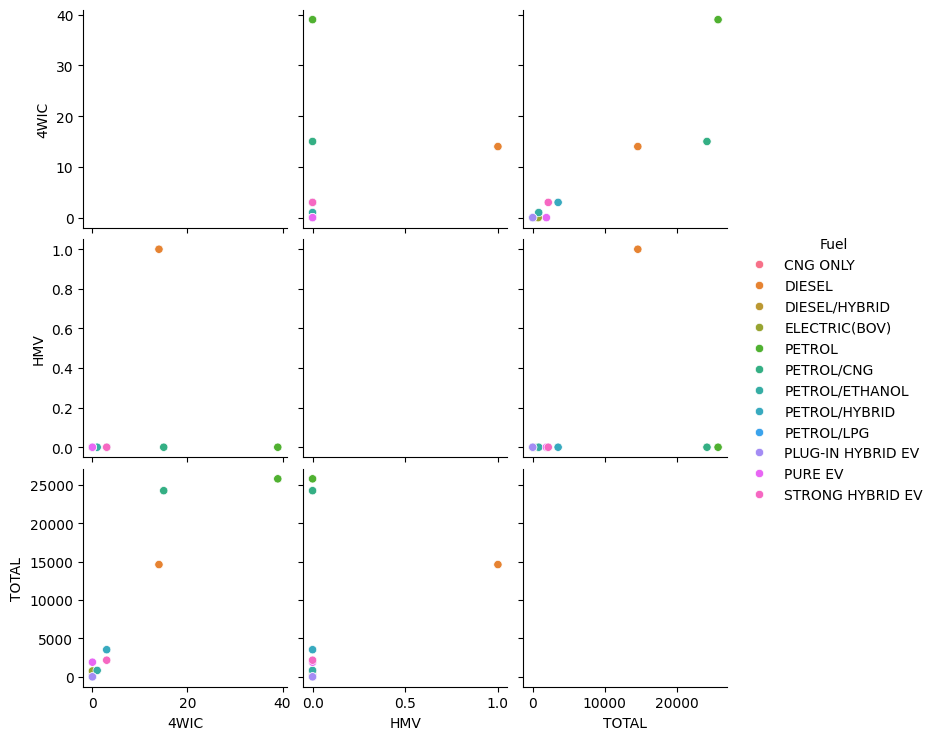

In [50]:
import seaborn as sb
sb.pairplot(df,hue='Fuel')

<Axes: >

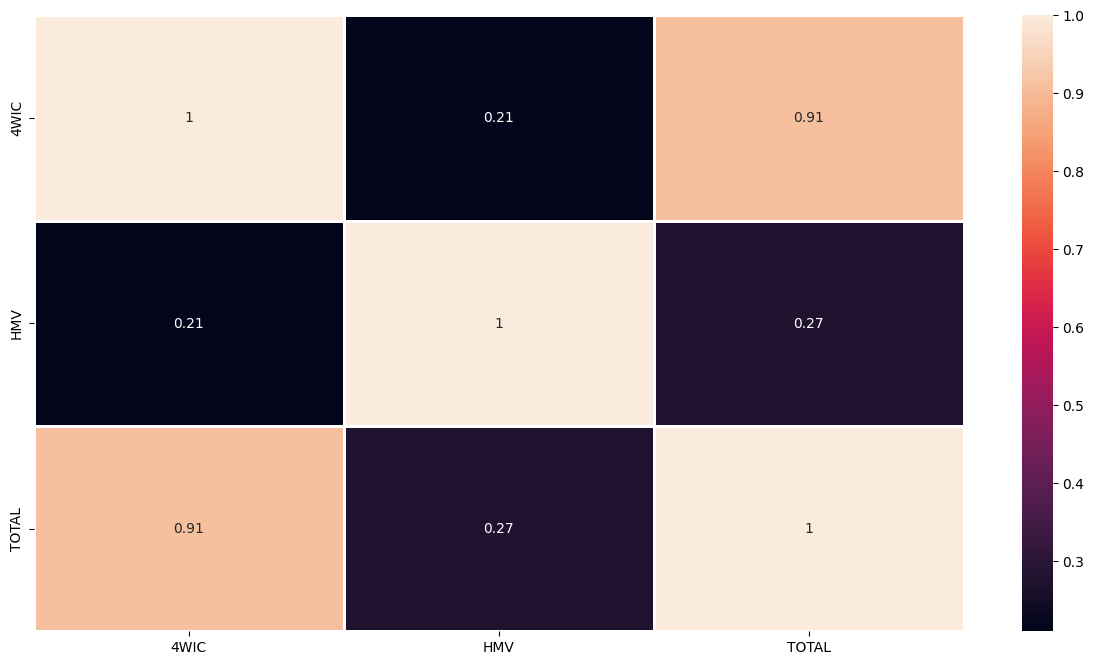

In [51]:
ax= plt.figure(figsize=(15,8))
# Calculate correlation only for numerical columns
numerical_df = df.select_dtypes(include=['number'])
sb.heatmap(numerical_df.corr(),linewidths=1,linecolor='white',annot=True)

Making Some Comparisions for our dataset


Frequency of the Brands in the dataset


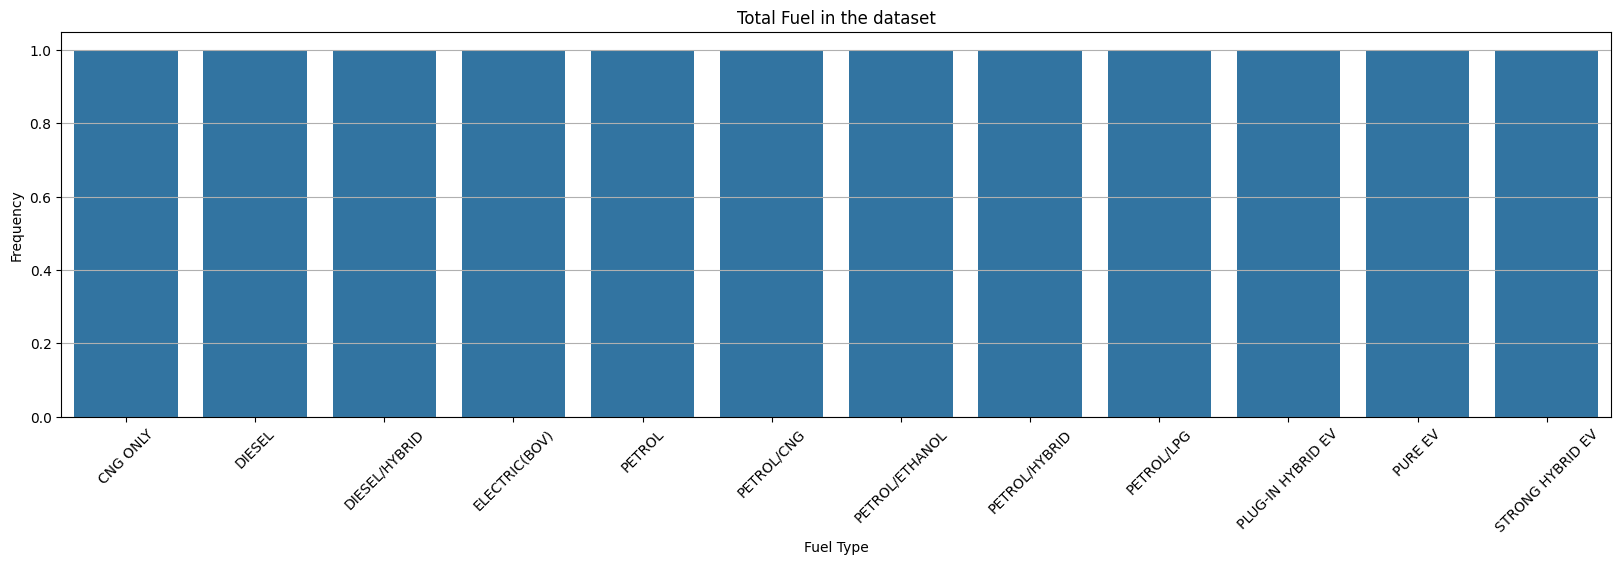

In [52]:
ax = plt.figure(figsize=(20, 5))
# Assuming you want to plot the frequency of each fuel type
fuel_counts = df['Fuel'].value_counts()  # Count occurrences of each fuel type
# Removed 'data=df' and using fuel_counts for both x and y
#Instead of TOTAL.index, use fuel_counts.index to get the fuel types for the x-axis
sb.barplot(x=fuel_counts.index, y=fuel_counts.values)  # Plot fuel types and their counts
plt.grid(axis='y')
plt.title('Total Fuel in the dataset')
plt.xlabel('Fuel Type')  # Changed x-axis label to 'Fuel Type'
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()  # Added plt.show() to display the plot

In [53]:
from sklearn.preprocessing import StandardScaler

# Select relevant numerical features
features = df[['4WIC', 'LMV', 'TOTAL']]

# Convert the columns to numeric, handling errors
for col in features.columns:
    #features[col] = pd.to_numeric(features[col].str.replace(',', ''), errors='coerce')
    # Replacing the above line with the below to avoid str accessor to numerical values
    features[col] = pd.to_numeric(features[col].astype(str).str.replace(',', ''), errors='coerce')

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

<ipython-input-53-1750bb2de8b9>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-1750bb2de8b9>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-1750bb2de8b9>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select relevant numerical features
features = df[['4WIC', 'LMV', 'TOTAL']]

# Convert the columns to numeric, handling errors
for col in features.columns:
    features[col] = pd.to_numeric(features[col].astype(str).str.replace(',', ''), errors='coerce')

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # or strategy='median' if preferred
features = imputer.fit_transform(features)

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

<ipython-input-54-1fdf0801a7cc>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-1fdf0801a7cc>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-1fdf0801a7cc>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



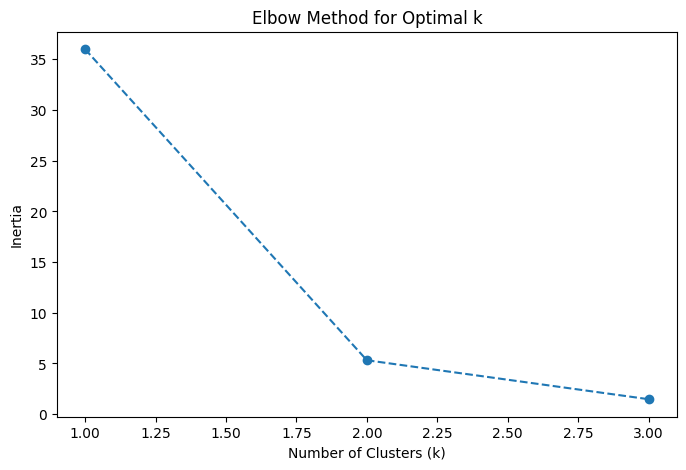

In [55]:
from sklearn.cluster import KMeans
import numpy as np

# Find optimal k using Elbow Method
inertia = []
k_range = range(1, 4)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [56]:
# Apply K-Means clustering with k=2
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

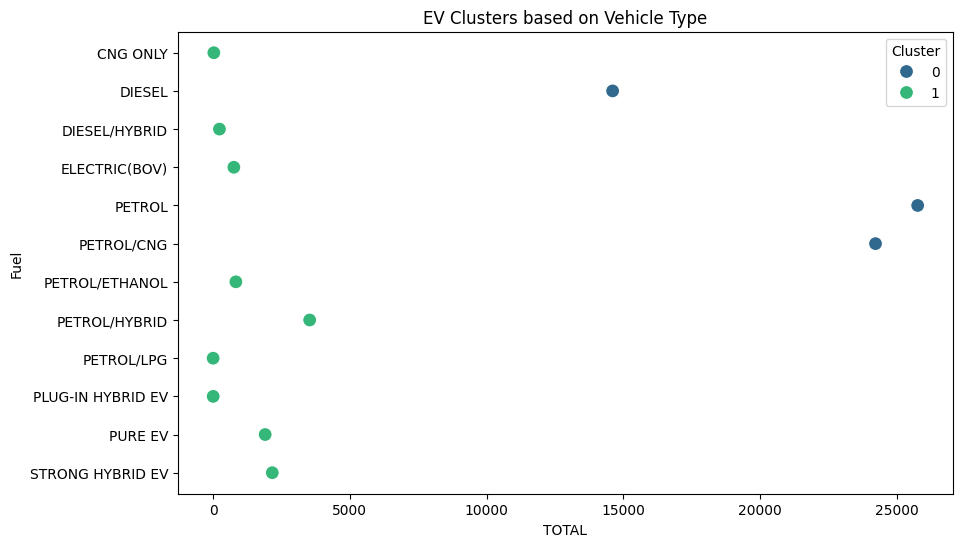

In [57]:
# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['TOTAL'], y=df['Fuel'], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel('TOTAL')
plt.ylabel('Fuel')
plt.title('EV Clusters based on Vehicle Type')
plt.legend(title="Cluster")
plt.show()
